## Example for [break_axes]()

```bash
# install from pypi
pip install break_axes

# Install the package locally
pip install -e .
```

In [1]:
import matplotlib.pyplot as plt

from break_axes import __version__, scale_axes, broken_and_clip_axes

plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.linewidth'] = 1.5

print(f"break_axes version: {__version__}")

break_axes version: 0.4.0


## Multiple Broken Axes


{'bottom': [(<matplotlib.lines.Line2D at 0x24dcb1fb750>,
   <matplotlib.lines.Line2D at 0x24dcb1fb890>),
  (<matplotlib.lines.Line2D at 0x24dcb1fb9d0>,
   <matplotlib.lines.Line2D at 0x24dcb1fbb10>)],
 'left': [(<matplotlib.lines.Line2D at 0x24dcb1fbc50>,
   <matplotlib.lines.Line2D at 0x24dcb1fbd90>)]}

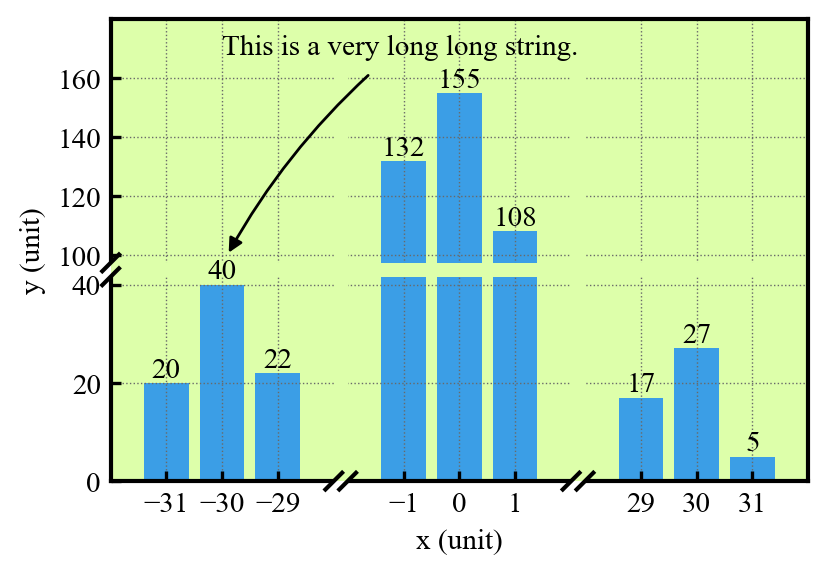

In [2]:
fig, ax = plt.subplots(figsize=(4.5,3))
ax.set(xlim=(-32,32), ylim=(0,180), xlabel="x (unit)", ylabel="y (unit)")
ax.set_facecolor("#DDFFAA")
ax.grid(ls=':', lw=0.5, color='dimgray')

# scale x-axis and y-axis to reduce the blank space
scale_axes(ax,
           x_interval=[(-28, -2, 0.01), (2, 28, 0.01)],
           y_interval=[(40,100, 0.1), (100, 180, 0.6)], 
           mode="linear")


_ = ax.set_xticks([-31,-30,-29,-1,0,1,29,30,31])
_ = ax.set_yticks([0,20, 40, 100, 120, 140,160])

rects = ax.bar([-31,-30,-29,-1,0,1,31,30,29], [20,40,22,132,155,108,5,27,17] )
ax.bar_label(rects)

# Text and Annotation wont be clipped
ax.annotate("This is a very long long string.", xy=(-30, 80), xytext=(-30, 168), 
    arrowprops=dict(
        arrowstyle='-|>',
        connectionstyle="arc3,rad=0.1", 
        color='k', 
        shrinkA=5, shrinkB=5
    )
)

# Add broken line in x-axis and y-axis, clip spines and artists in axes
broken_and_clip_axes(ax, x=[-15,15], y=[70], axes_clip=True, which='lower',
                     gap=5, dx=3, dy=3)

# plt.savefig("break_axes_bar.png", transparent=False)

## Log Axes


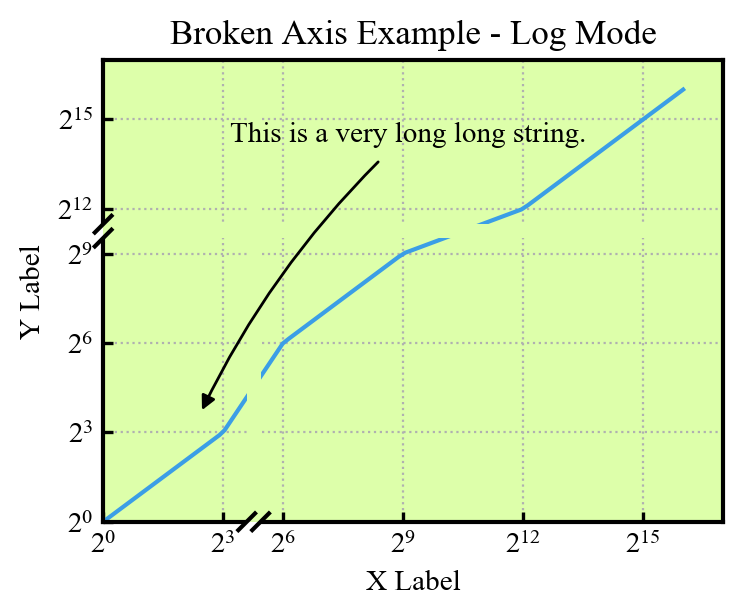

In [ ]:
import numpy as np

x = np.logspace(0, 16, 100, base=2)

fig, ax = plt.subplots(figsize=(4,3))
ax.set(xlim=(1, 2<<16), ylim=(1, 2<<16), facecolor="#DDFFAA")  
ax.plot(x, x)
ax.set_xticks([ 2<<i for i in range(0,17,3)]) 

ax.annotate("This is a very long long string.", 
    xy=(5, 10), xytext=(10, 20000), 
    arrowprops=dict(
        arrowstyle='-|>',
        connectionstyle="arc3,rad=0.1", 
        color='k', 
        shrinkA=5, shrinkB=5
    )
)

ax.grid(ls=':')
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_title("Broken Axis Example - Log Mode")

scale_axes(ax, 
    x_interval=[(3, 6, 0.5)], 
    y_interval=[(9, 12, 0.5)],
    mode='log', base_x=2, base_y=2)
broken_and_clip_axes(ax, x=[23], y=[1450], 
    axes_clip=True, which='lower', gap=5, dx=3, dy=3)

plt.show()

## Even for Contour Plot

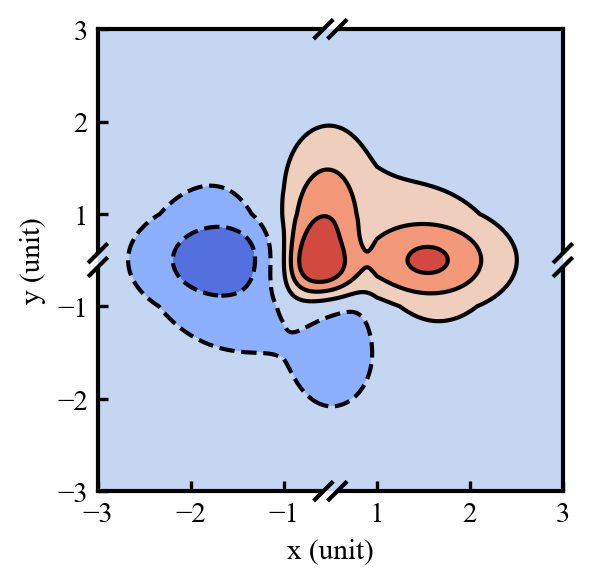

In [4]:
import numpy as np

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
levels = np.linspace(Z.min(), Z.max(), 7)

# plot
fig, ax = plt.subplots()
ax.set(xlabel="x (unit)", ylabel="y (unit)", xlim=(-3,3), ylim=(-3,3))

ax.contour(X, Y, Z, levels=levels, colors='k')
ax.contourf(X, Y, Z, levels=levels)

scale_axes(ax, 
    x_interval=[(-1, 1, 0.5)], 
    y_interval=[(-1, 1, 0.5)])
broken_and_clip_axes(ax, x=[0], y=[0], 
    axes_clip=False, which='both', gap=5, dx=3, dy=3)

ax.set_xticks([-3,-2,-1,1,2,3])
ax.set_yticks([-3,-2,-1,1,2,3])
plt.show()

## Set Broken Lines Property

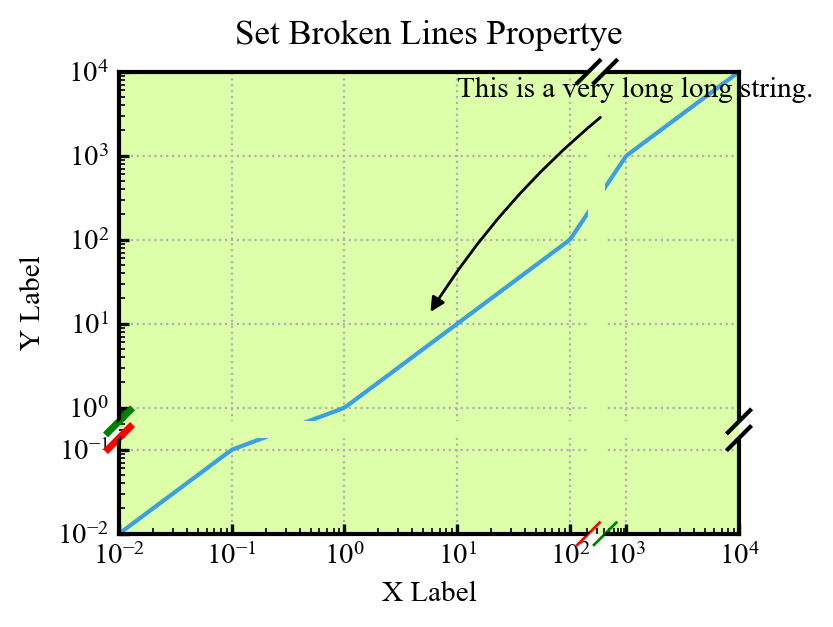

In [17]:
import numpy as np

x = np.logspace(-2, 4, 150)

fig, ax = plt.subplots(figsize=(4,3))
ax.set(xlim=(1,10000), ylim=(1,10000), facecolor="#DDFFAA")  
ax.plot(x, x)
ax.set_xticks([0.01, 0.1, 1, 10, 100, 500, 5000, 10000]) 
ax.set_yticks([0.01, 0.1, 1, 10, 100, 500, 5000, 10000])

ax.annotate("This is a very long long string.", 
    xy=(5, 10), xytext=(10, 5000), 
    arrowprops=dict(
        arrowstyle='-|>',
        connectionstyle="arc3,rad=0.1", 
        color='k', 
        shrinkA=5, shrinkB=5
    )
)

ax.grid(ls=':')
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_title("Set Broken Lines Propertye", pad=10)

scale_axes(ax, 
    x_interval=[(2, 3, 0.5)], 
    y_interval=[(-1, 0, 0.5)],
    mode='log')
broken_lines = broken_and_clip_axes(ax, x=[300], y=[0.3], 
    axes_clip=True, which='both', gap=6, dx=4, dy=4)

bottom_left, bottom_right = broken_lines["bottom"][0]
bottom_left.set(color='r', linewidth=1)
bottom_right.set(color='g', linewidth=1)

left_bottom, left_top = broken_lines["left"][0]
left_bottom.set(color='r', linewidth=2.5)
left_top.set(color='g', linewidth=2.5)

plt.show()

{'left': [(<matplotlib.lines.Line2D at 0x24dcb9ab890>,
   <matplotlib.lines.Line2D at 0x24dcb9ab9d0>)],
 'right': [(<matplotlib.lines.Line2D at 0x24dcb9abb10>,
   <matplotlib.lines.Line2D at 0x24dcb9abc50>)]}

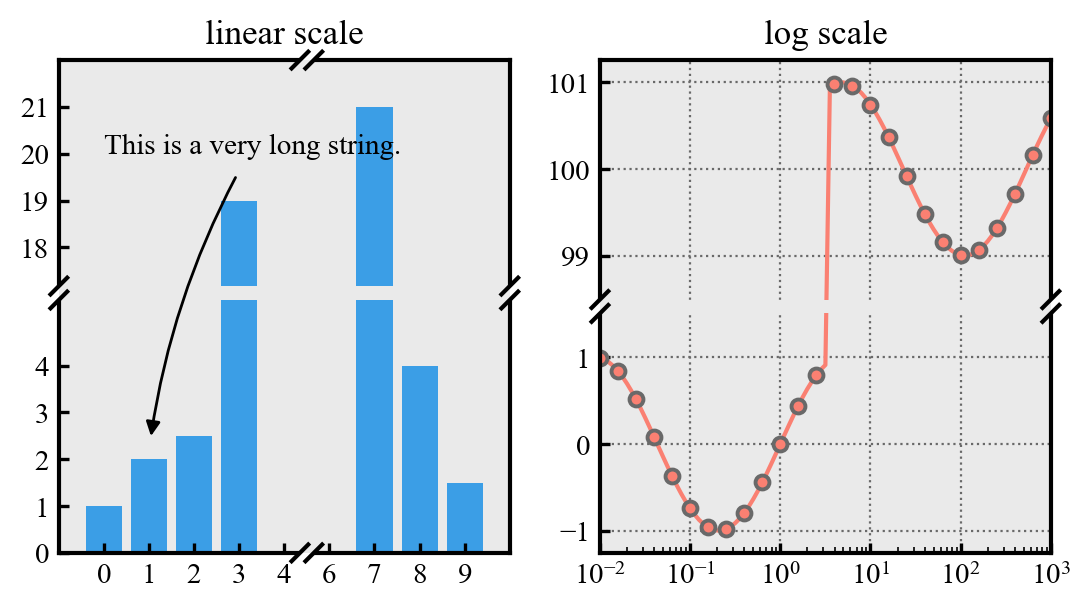

In [6]:
# plt.rcParams['figure.subplot.bottom'] = 0.2
# plt.rcParams['figure.subplot.top'] = 0.8
# plt.rcParams['figure.subplot.left'] = 0.12
# plt.rcParams['figure.subplot.right'] = 0.92

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4, 3.2))


ax1.set_title("linear scale")
ax1.set(xlim=(-1, 10), ylim=(0, 22), facecolor='#EAEAEA')
ax1.bar([0,1,2,3,7,8,9], [1,2,2.5,19,21,4,1.5])
ax1.annotate("This is a very long string.", xy=(1,2.2), xytext=(0,20),
             arrowprops=dict(
                 arrowstyle='-|>',
                 connectionstyle="arc3,rad=0.1", 
                 color='k', 
                 shrinkA=5, shrinkB=5
             ))


scale_axes(ax1, x_interval=[(4, 6, 0.5)],
           y_interval=[(4.5, 18, 0.15)])
ax1.set_xticks([0,1,2,3,4, 6,7,8,9])
ax1.set_yticks([0,1,2,3,4,18, 19,20,21])
broken_and_clip_axes(ax1, x=[5], y=[11.5])


ax2.set_title("log scale")
ax2.set(xscale='log', xlim=(0.01,1000), facecolor='#EAEAEA')
x = np.logspace(-2,3,101)
y = np.sin(np.log(x))
y[x>3.3] += 100 
ax2.plot(x, y, marker='o', markevery=4, markersize=5, mew=1.4,
         markeredgecolor='dimgray', color='C1')

scale_axes(ax2, y_interval=[(1+0.1,99-0.1,0.01)])
ax2.set_yticks([-1,0,1,99,100,101])
ax2.grid(ls=':', color='dimgray')
broken_and_clip_axes(ax2, y=[50])

# fig.savefig("multi_axes.png", transparent=False)